In [4]:
from os import walk
from os.path import isfile, join, basename
import pathlib
import matplotlib.pyplot as plt

import cv2
import glob

import numpy as np

from tqdm import tqdm

/Users/apple/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/apple/anaconda/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [51]:
def pipeline(img=None):
    """Find lane lines in an input image

    Each stage of the pipeline transforms until we paint lines where the lane
    lines are.
    """
    # cut out polygon of image

    # flatten and scale image

    # sobel operator threshold

    # mag_thresh threshold

    # dir_threshold threshold

    # combine previous 3 thresholds

    # find histograms

    # sliding window search

    # Measure curvature with f(y)=Ay^2 + By + C

    # paint lines on image
    pass

In [13]:
def camera_calibration(root_dir='camera_cal',
                       calibrated_dir='calibrated_dir', nx=9, ny=6):
    # read each pathname in camera_cal folder
    images = glob.glob('camera_cal/calibration*.jpg')

    pathlib.Path(calibrated_dir).mkdir(parents=True, exist_ok=True)
    # mkdir for outputting to calibration_complete_dir

    objpoints = []
    imgpoints = []
    objp = np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)


    for img_file_name in tqdm(images, desc="finding corners"):

        img = cv2.imread(img_file_name)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

    mtx, dist = None,None
    
    for img_file_name in tqdm(images, desc="calibrating cameras"):
        img = cv2.imread(img_file_name)
        img_size = (img.shape[1], img.shape[0])

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints,
                                                           imgpoints,
                                                           gray.shape[::-1],
                                                           None, None)
        img = cv2.undistort(img, mtx, dist)
        img_path_out = join(calibrated_dir, basename(img_file_name))
        cv2.imwrite(img_path_out,img)
        
    return mtx, dist
        
mtx, dist = camera_calibration()

calibrating cameras: 100%|██████████| 20/20 [00:15<00:00,  1.33it/s]


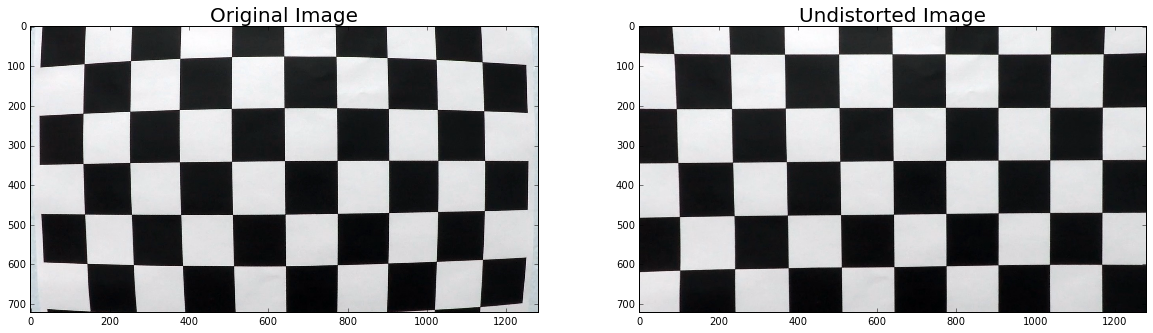

In [26]:
calibrated_img = cv2.imread('calibrated_dir/calibration1.jpg')
distorted_img = cv2.imread('camera_cal/calibration1.jpg')

fig, (plt_original, plt_distorted) = plt.subplots(1, 2, figsize=(20,10))
plt_original.imshow(distorted_img)
plt_original.set_title('Original Image', fontsize=20)
plt_distorted.imshow(calibrated_img)
plt_distorted.set_title('Undistorted Image', fontsize=20)

In [45]:
calibrated_img = cv2.imread('test_images/test1.jpg')
h,w = calibrated_img.shape[:2]

src = np.float32([[(550,475),
                   (720,475),
                   (235,685),
                   (1084,685)
                  ]])

dst = np.float32([(450,0),
                  (w-450,0),
                  (450,h),
                  (w-450,h)])

def corners_unwarp(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return M, warped

M, distorted_img = corners_unwarp(calibrated_img, src, dst)


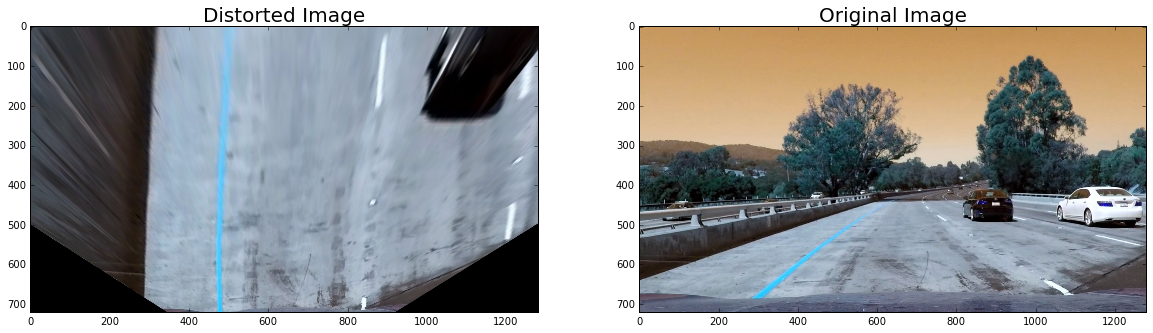

In [47]:

fig, (plt_original, plt_distorted) = plt.subplots(1, 2, figsize=(20,10))
plt_original.imshow(distorted_img)
plt_original.set_title('Distorted Image', fontsize=20)
plt_distorted.imshow(calibrated_img)
plt_distorted.set_title('Original Image', fontsize=20)

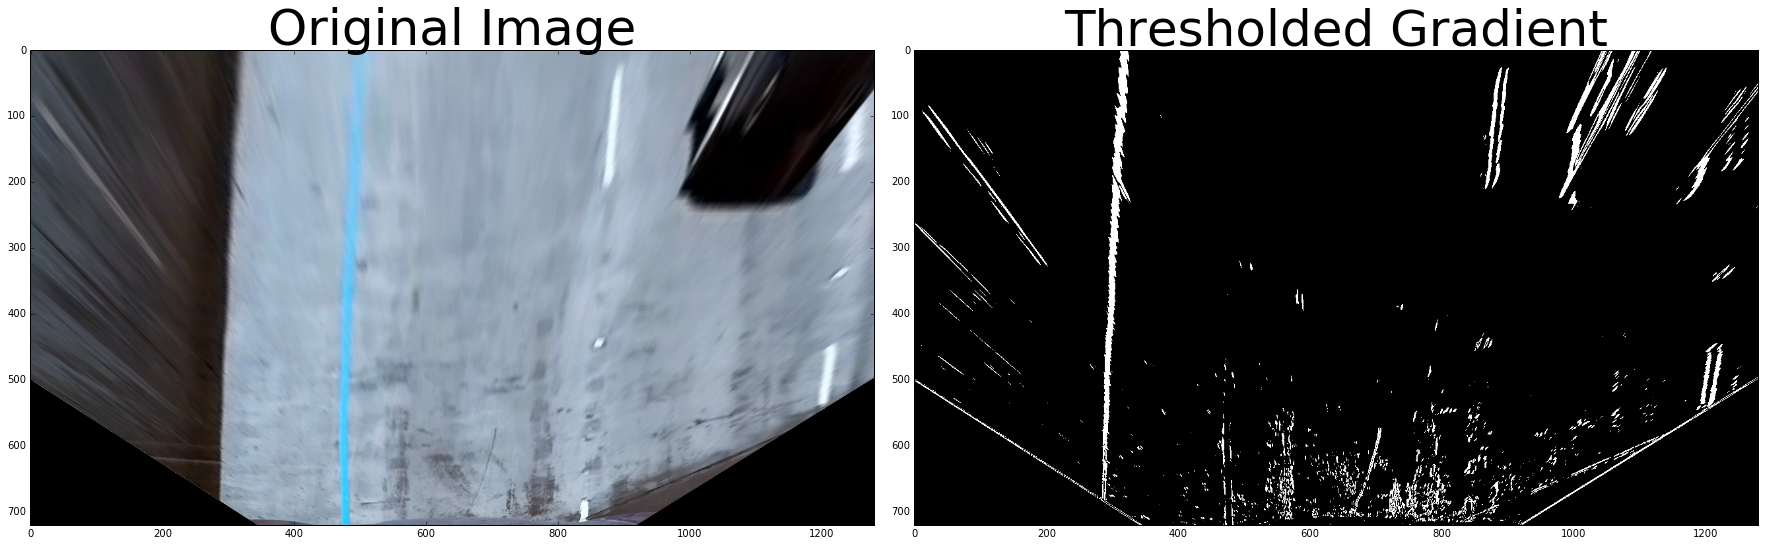

In [50]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    else:
        sobelx = None
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobelx)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # plt.imshow(sxbinary, cmap='gray')
    
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(sxbinary) # Remove this line
    return binary_output

grad_binary = abs_sobel_thresh(distorted_img, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorted_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)